<a href="https://colab.research.google.com/github/Krit-Barnwal/Summer-Ai-Ml/blob/main/AIML_11_sarima%26arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

data = pd.read_csv('AirPassengers.csv')

print(data.shape)
data.head()



(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# convert the month column from text to datatime

data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.head(50)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [ ]:
# set the month column as the index of the pandas dataframe

data.set_index('Month',inplace=True)

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

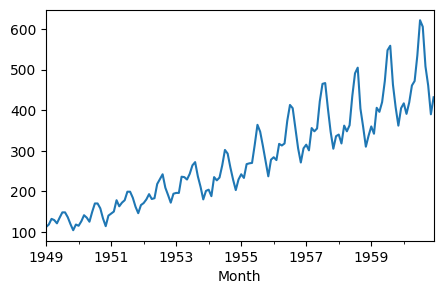

In [ ]:
import matplotlib.pyplot as plt
# visualise the data
data['#Passengers'].plot(figsize=(5,3))

Text(0.5, 1.0, 'Residual')

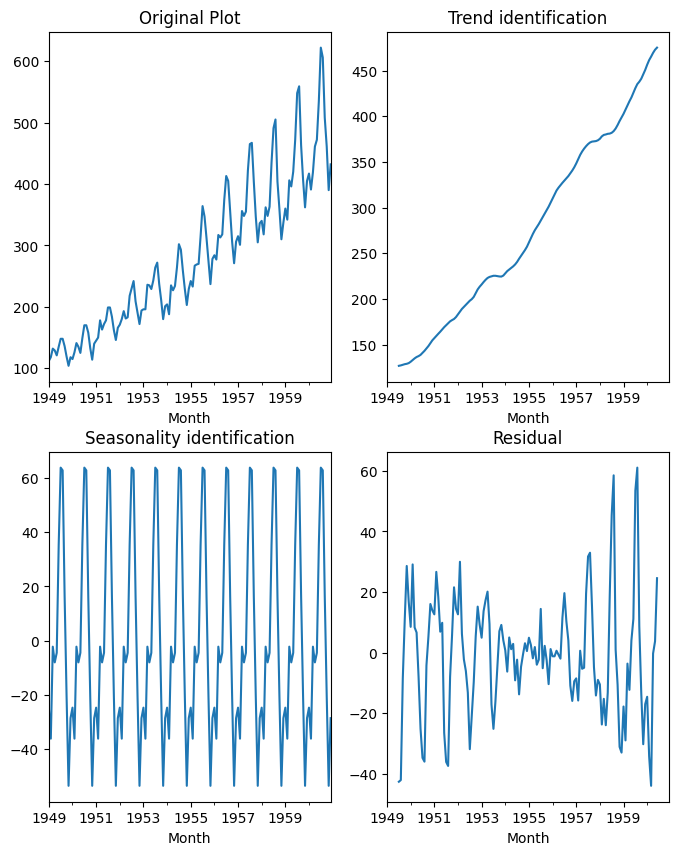

In [ ]:
tempData = data['#Passengers']
OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData)
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')


In [ ]:
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.331718
Freq: MS, dtype: float64


In [ ]:
tempData.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [ ]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# i want to forecast the one year data
tempData = filtered_data['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

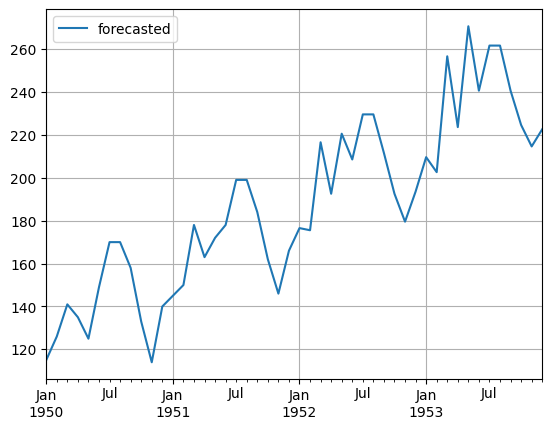

In [ ]:
plt.figure(1)
tempData.plot(label='forecasted')
#OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

In [ ]:
filtered_data = data[(data.index.year == 1950) | (data.index.year == 1951)]

In [ ]:
filtered_data

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158


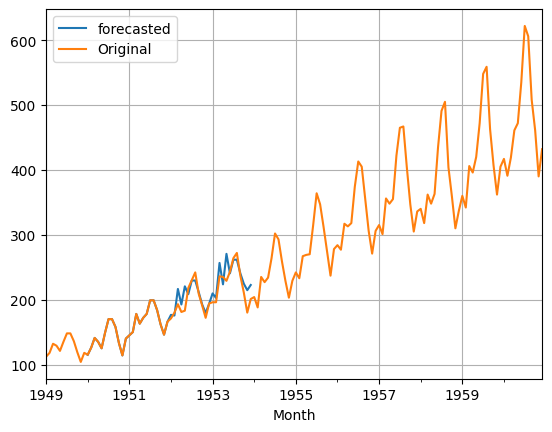

In [ ]:
plt.figure(1)
tempData.plot(label='forecasted')
data['#Passengers'].plot(label='Original')
plt.legend()
plt.grid('on')

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

auto_arima(tempData,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1099.510, Time=4.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1114.210, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1101.327, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1101.882, Time=0.52 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1100.126, Time=1.73 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1099.694, Time=2.05 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=inf, Time=9.52 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1101.542, Time=3.75 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1099.946, Time=0.39 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1099.555, Time=2.41 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=1099.143, Time=3.37 sec
 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1103.003, Time=2.58 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1097.290, Time=1.83 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1098.062, Time=0.77 sec
 ARIMA(2,1,1)(2,1,1)[12]

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)